# Let's look at some data
for now just the pilot data
I'll go through Ethan's code quickly and then let you do your thing

## Class 2

In [1]:
import pandas as pd
import seaborn as sns
import pingouin as pg
import matplotlib.pyplot as plt

In [2]:
raw = pd.DataFrame(pd.read_csv('https://raw.githubusercontent.com/ethanweed/OpenSesame/master/Class2/class_2_pilot.csv'))

raw.head(50)

,Block,Category,Mod_level,Prime_word,acc,accuracy,average_response_time,avg_rt,background,bidi,...,time_practice,time_prime,time_target,title,total_correct,total_response_time,total_responses,uniform_coordinates,width,word_length
0,practice,NaN,practice,NaN,100,100,857,857,black,no,...,92,11432,11516,ExPsyLing2022_Class2,1,857,1,yes,1024,4
1,practice,NaN,practice,NaN,100,100,809,809,black,no,...,92,13697,13780,ExPsyLing2022_Class2,2,1617,2,yes,1024,4
2,practice,NaN,practice,NaN,100,100,877,877,black,no,...,92,15878,15961,ExPsyLing2022_Class2,3,2631,3,yes,1024,6
3,practice,NaN,practice,NaN,100,100,825,825,black,no,...,92,18326,18409,ExPsyLing2022_Class2,4,3299,4,yes,1024,5
4,block3,manmade,one_modification,LI$T,100,100,825,825,black,no,...,92,23055,23138,ExPsyLing2022_Class2,5,4126,5,yes,1024,4
5,block3,manmade,one_modification,C4NDY,83,83,802,802,black,no,...,92,25319,25403,ExPsyLing2022_Class2,5,4809,6,yes,1024,5
6,block3,natural,unrelated,CATS,86,86,823,823,black,no,...,92,27451,27534,ExPsyLing2022_Class2,6,5759,7,yes,1024,4
7,block3,manmade,two_modifications,B411,88,88,862,862,black,no,...,92,29849,29932,ExPsyLing2022_Class2,7,6892,8,yes,1024,4
8,block3,natural,two_modifications,)U[K,89,89,853,853,black,no,...,92,32429,32513,ExPsyLing2022_Class2,8,7678,9,yes,1024,4
9,block3,manmade,unrelated,HOME,90,90,850,850,black,no,...,92,34665,34761,ExPsyLing2022_Class2,9,8496,10,yes,1024,4


In [3]:
df = pd.DataFrame({'id': raw.jatosStudyResultId,
                 'block': raw.Block,
                 'category': raw.Category,
                 'condition': raw.Mod_level,
                 'prime': raw.prime,
                 'target': raw.target,
                 'word_length': raw.word_length,
                 'rt': raw.response_time,
                  'correct': raw.correct})
df = df.loc[df['block'] != 'practice']

df.head(50)

,id,block,category,condition,prime,target,word_length,rt,correct
4,970,block3,manmade,one_modification,*****,LIST,4,827,1
5,970,block3,manmade,one_modification,*****,CANDY,5,683,0
6,970,block3,natural,unrelated,*****,MOON,4,950,1
7,970,block3,manmade,two_modifications,*****,BALL,4,1133,1
8,970,block3,natural,two_modifications,*****,DUCK,4,786,1
9,970,block3,manmade,unrelated,*****,COAT,4,818,1
10,970,block3,manmade,two_modifications,*****,MAIL,4,684,1
11,970,block3,natural,two_modifications,*****,LEAF,4,667,1
12,970,block3,manmade,one_modification,*****,CAKE,4,737,1
13,970,block3,manmade,unrelated,*****,OVEN,4,766,1


In [4]:

sorter = ['exact', 'unrelated', 'one_modification', 'two_modifications']

In [5]:
# making condition a so-called 'category'
df.condition = df.condition.astype("category")
# this sorts the cateogires so it is no longer in alphabetical order but our order
# useful for plotting and analysis purposes 
df.condition = df.condition.cat.set_categories(sorter)

df.condition

4       one_modification
5       one_modification
6              unrelated
7      two_modifications
8      two_modifications
             ...        
331            unrelated
332     one_modification
333            unrelated
334    two_modifications
335     one_modification
Name: condition, Length: 312, dtype: category
Categories (4, object): ['exact', 'unrelated', 'one_modification', 'two_modifications']

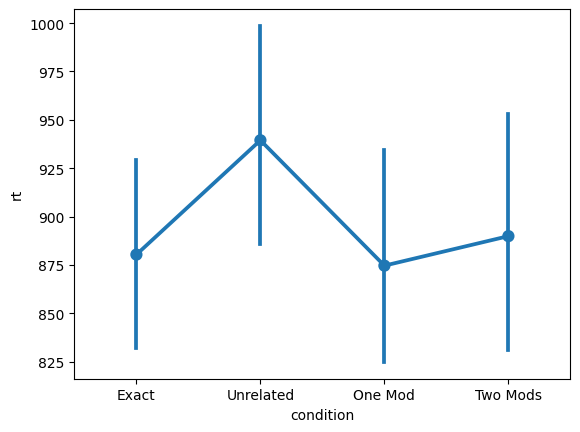

In [6]:
f1 = sns.pointplot(data = df, x = 'condition', y = 'rt')
f1.set_xticklabels(['Exact', 'Unrelated', 'One Mod', 'Two Mods'])
plt.show()

In [78]:
# removing outliers?
outliers = df.loc[df['rt'] > 1600]
df = df.loc[df['rt'] < 1600]
len(outliers)

10

In [79]:
pg.rm_anova(data = df, dv = 'rt', within = ['condition'], subject = 'id')

,Source,ddof1,ddof2,F,p-unc,ng2,eps
0,condition,3,15,4.817145,0.015244,0.065809,0.780613


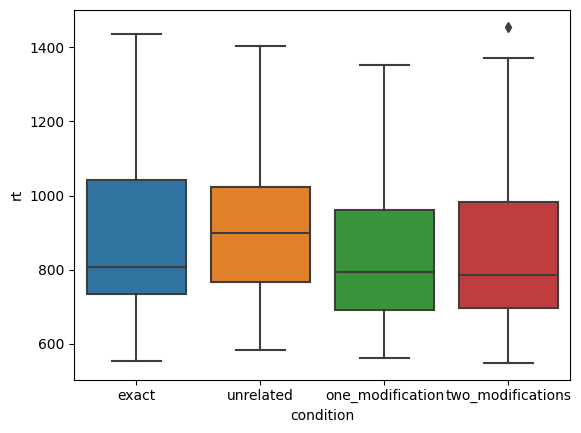

In [80]:
f1 = sns.boxplot(data = df, x = 'condition', y = 'rt')


## Class 1

In [52]:
raw = pd.read_csv('https://raw.githubusercontent.com/ethanweed/OpenSesame/master/Class1/28-11-2022_class1_pilot.csv')

df = pd.DataFrame({'Accuracy': raw['correct'],
                    'ID': raw['jatosStudyResultId'],
                    'RT': raw['response_time'],
                     'Prime': raw['prime'],
                     'Target': raw['target'],
                     'WordLength': raw['num_letters'],
                     'Condition': raw['condition']
                    })

df = df.loc[df['Condition'] != 'practice']
df.head(50)



,Accuracy,ID,RT,Prime,Target,WordLength,Condition
6,1,924,724,eperpp,pepper,6,fully-scrambled
7,1,924,544,bclorcoi,broccoli,8,semi-scrambled
8,1,924,613,rhubarb,rhubarb,7,identical
9,1,924,713,tupocsu,octupus,7,fully-scrambled
10,1,924,684,ronc,corn,4,fully-scrambled
11,1,924,1018,parsnip,parsnip,7,identical
12,1,924,642,punre,prune,5,semi-scrambled
13,1,924,484,ooinn,onion,5,semi-scrambled
14,1,924,474,susqah,squash,6,semi-scrambled
15,1,924,533,croart,carrot,6,semi-scrambled


<AxesSubplot:xlabel='Condition', ylabel='RT'>

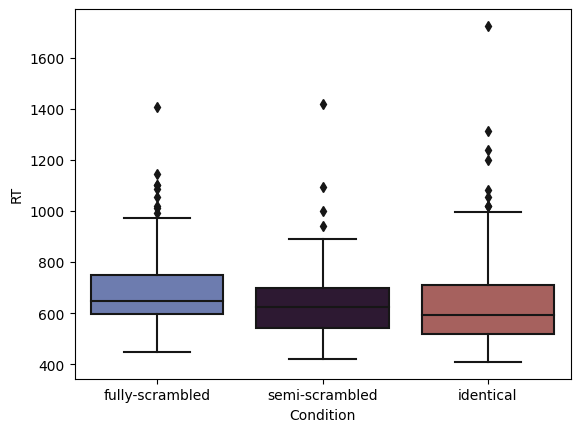

In [53]:
sns.boxplot(data = df, x = 'Condition', y = 'RT', palette = 'twilight')

above indicates it might make sense to remove outliers 

In [54]:
outliers = df.loc[df['RT'] > 1200]
df = df.loc[df['RT'] <= 1200]
len(outliers)

5

In [55]:
pg.rm_anova(data = df, dv = 'RT', within = ['Condition'], subject = 'ID')

,Source,ddof1,ddof2,F,p-unc,ng2,eps
0,Condition,2,6,5.267842,0.047774,0.33872,0.739627


<AxesSubplot:xlabel='Condition', ylabel='RT'>

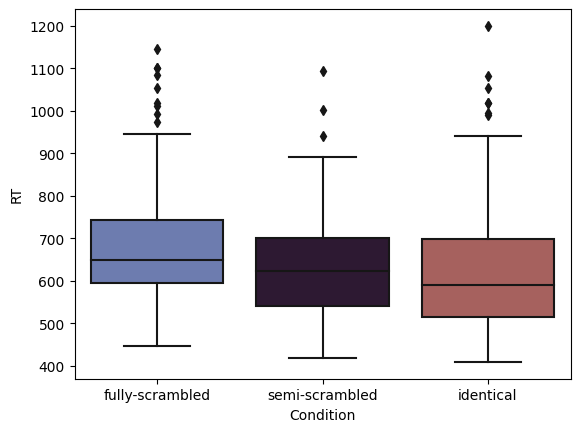

In [56]:
sns.boxplot(data = df, x = 'Condition', y = 'RT', palette = 'twilight')